# Ejercicio de regresion logistica

## Importar librerias

In [233]:
##Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [234]:
from sklearn import preprocessing

## Funciones

In [235]:
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

In [236]:
##FUncion reemplazo de datos categóricos NAN
def imputacionCatNA(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

In [237]:
## Funcion para binarizar datos categoricos de solo dos opciones
def binarizar(df,nomCol):
    label_e = preprocessing.LabelEncoder()
    df[nomCol] = label_e.fit_transform(df[nomCol])
    return df

## Importar Dataset

In [238]:
url = "https://raw.githubusercontent.com/jaquimbayoc8/DiplomadoMLA2023/main/5.RegresionLogistica/Dataset/weatherAUS.csv"
df = pd.read_csv(url)

## Extracion de datos


In [239]:
##Extraer los encabezados del dataframe
enca = df.columns
print(enca)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


## Sacar variables categoricas

In [240]:
## Sacar las variables Categóricas
categoricas = [i for i in df.columns if df[i].dtype=='O']

print('Hay {} variables de tipo categórico'.format(len(categoricas)))

print('Las variables categóricas son:', categoricas)

Hay 7 variables de tipo categórico
Las variables categóricas son: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [241]:
df_cate = df[categoricas]

df_cate.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [242]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 7 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                    Date     object        3436          0
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


In [243]:
df_cate[categoricas].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [244]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 7 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                    Date     object        3436          0
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


## Vamos a sacar los conteos de datos NAN sin los valores de cero

In [245]:
## Vamos a sacar los conteos de datos NAN sin los valores de cero
cat1 = [i for i in categoricas if df[i].isnull().sum()!= 0]
print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


## Revisar las etiquetas u opciones de las variables

In [246]:
##Revisar las etiquetas u opciones de las variables
for i in categoricas:
    print(i, 'contiene', len(df[i].unique()),'Etiquetas')

Date contiene 3436 Etiquetas
Location contiene 49 Etiquetas
WindGustDir contiene 17 Etiquetas
WindDir9am contiene 17 Etiquetas
WindDir3pm contiene 17 Etiquetas
RainToday contiene 3 Etiquetas
RainTomorrow contiene 3 Etiquetas


## Vamos a limpiar la data

### Para esto primero vamos a categorizar la fecha por dia, mes y año

In [247]:
df_date_ = pd.DataFrame()

In [248]:
##categorica la fecha - Date

df_date_['Date'] = pd.to_datetime(df_cate['Date'])

In [249]:
###Extraer el año a una columna
df_cate['Year'] = df_date_['Date'].dt.year

df_cate['Year']



0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145455    2017
145456    2017
145457    2017
145458    2017
145459    2017
Name: Year, Length: 145460, dtype: int64

In [250]:
###Extracción de mes
df_cate['Month'] = df_date_['Date'].dt.month

df_cate['Month']

0         12
1         12
2         12
3         12
4         12
          ..
145455     6
145456     6
145457     6
145458     6
145459     6
Name: Month, Length: 145460, dtype: int64

In [251]:
###Extracción de dia
df_cate['Day'] = df_date_['Date'].dt.day

df_cate['Day']



0          1
1          2
2          3
3          4
4          5
          ..
145455    21
145456    22
145457    23
145458    24
145459    25
Name: Day, Length: 145460, dtype: int64

In [252]:
##Eliminar la fecha normal
df_cate.drop('Date', axis=1, inplace=True)

In [253]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 9 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267
                                    Year      int64          11          0
                                   Month      int64          12          0
                                     Day      int64          31          0


In [254]:
# Seleccionar las tres columnas
df_fecha = df_cate[['Year', 'Month', 'Day']]

# Eliminar las columnas del dataframe original
df_cate.drop(columns=['Year', 'Month', 'Day'], inplace=True)

In [255]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 6 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


## Eliminar datos NaN o imputar datos con la moda

In [256]:
df_cate['WindGustDir'] = imputacionCatNA(df_cate, 'WindGustDir')

In [257]:
df_cate['WindDir9am'] = imputacionCatNA(df_cate, 'WindDir9am')

In [258]:
df_cate['WindDir3pm'] = imputacionCatNA(df_cate, 'WindDir3pm')

In [259]:
df_cate['RainToday'] = imputacionCatNA(df_cate, 'RainToday')

In [260]:
df_cate['RainTomorrow'] = imputacionCatNA(df_cate, 'RainTomorrow')

In [261]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 6 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object          16          0
                              WindDir9am     object          16          0
                              WindDir3pm     object          16          0
                               RainToday     object           2          0
                            RainTomorrow     object           2          0


## **Tarea 1: Agregar las variables dummies al df original y eliminar la columna de base**

In [262]:
df_dum = pd.DataFrame()

In [263]:
##Variables dummies de Location
df_dum = df_cate


In [264]:
# pd.get_dummies(df_dum.Location, drop_first=True)

## Vamos a recategorizar

In [265]:
nombres_columnas = {
    'W': 'Oeste',
    'WNW': 'NorOeste',
    'WSW': 'SurOeste',
    'NE': 'NorEste',
    'NNW': 'NorOeste',
    'N': 'Norte',
    'NNE': 'NorEste',
    'SW': 'SurOeste',
    'ENE': 'NorEste',
    'SSE': 'SurEste',
    'S': 'Sur',
    'NW': 'NorOeste',
    'SE': 'SurEste',
    'ESE': 'SurEste',
    'E': 'Este',
    'SSW': 'SurOeste',

}

wind_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in wind_columns:
    df_dum[col] = df_dum[col].replace(nombres_columnas)


In [266]:
print(df_dum['WindGustDir'].unique())

['Oeste' 'NorOeste' 'SurOeste' 'NorEste' 'Norte' 'SurEste' 'Sur' 'Este']


In [267]:
print(df_dum['WindDir9am'].unique())

['Oeste' 'NorOeste' 'SurEste' 'NorEste' 'SurOeste' 'Sur' 'Norte' 'Este']


In [268]:
print(df_dum['WindDir3pm'].unique())

['NorOeste' 'SurOeste' 'Este' 'Oeste' 'SurEste' 'NorEste' 'Norte' 'Sur']


## Vamos hacer dummies a las variables

In [269]:
## Vamos a binarizar las variables categorias con solo 2 opciones y las demas con dummies
### Lo vamos hacer con preprocessing de sklearn para el primer caso

for col in df_dum.columns:
    # Comprobar si la columna es categórica con 2 opciones
    if df_dum[col].nunique() == 2:
         binarizar(df_dum,col)
    
    else:
        dummies = pd.get_dummies(df_dum[col], prefix=col)
        df_dum = pd.concat([df_dum, dummies], axis=1)
        df_dum.drop(col, axis=1, inplace=True)


datos_NAN(df_dum)

Dimesiones: 145460 filas, 75 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                               RainToday      int32           2          0
                            RainTomorrow      int32           2          0
                       Location_Adelaide      uint8           2          0
                         Location_Albany      uint8           2          0
                         Location_Albury      uint8           2          0
                   Location_AliceSprings      uint8           2          0
                  Location_BadgerysCreek      uint8           2          0
                       Location_Ballarat      uint8           2          0
                        Location_Bendigo      uint8           2          0
                       Location_Brisbane      uint8           2          0
                         Location_Cairns      uint8           2          0
                       Location_

In [270]:
print(df_dum['RainTomorrow'].unique())

[0 1]


In [271]:
print(df_cate['WindGustDir'].unique())

['Oeste' 'NorOeste' 'SurOeste' 'NorEste' 'Norte' 'SurEste' 'Sur' 'Este']


In [272]:
print(df_cate['WindDir9am'].unique())

['Oeste' 'NorOeste' 'SurEste' 'NorEste' 'SurOeste' 'Sur' 'Norte' 'Este']


In [273]:
print(df_cate['WindDir3pm'].unique())

['NorOeste' 'SurOeste' 'Este' 'Oeste' 'SurEste' 'NorEste' 'Norte' 'Sur']


## Vamos a concatenar nuestras variables dummies con el df_fecha y el df original

In [274]:
##Categóricas y numéricas
numericas = [i for i in df.columns if df[i].dtype!='O']

print('Hay {} variables de tipo numerico'.format(len(numericas)))

print('Las variables categóricas son:', numericas)

Hay 16 variables de tipo numerico
Las variables categóricas son: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [275]:
df_numerico = df[numericas]

In [276]:
df_f = pd.concat([df_dum, df_numerico], axis=1)

In [277]:
df = pd.concat([df_f, df_fecha],axis=1)

In [278]:
###Filtro para variables numéricas
numericas = [i for i in df.columns if df[i].dtype!='O']

print('Hay {} variables de tipo Numéricas'.format(len(numericas)))

print('Las variables Numéricas son:', numericas)

Hay 94 variables de tipo Numéricas
Las variables Numéricas son: ['RainToday', 'RainTomorrow', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 

In [280]:
df[numericas].isnull().sum()

RainToday               0
RainTomorrow            0
Location_Adelaide       0
Location_Albany         0
Location_Albury         0
                     ... 
Temp9am              1767
Temp3pm              3609
Year                    0
Month                   0
Day                     0
Length: 94, dtype: int64

Text(0, 0.5, 'Cant Viento 3pm')

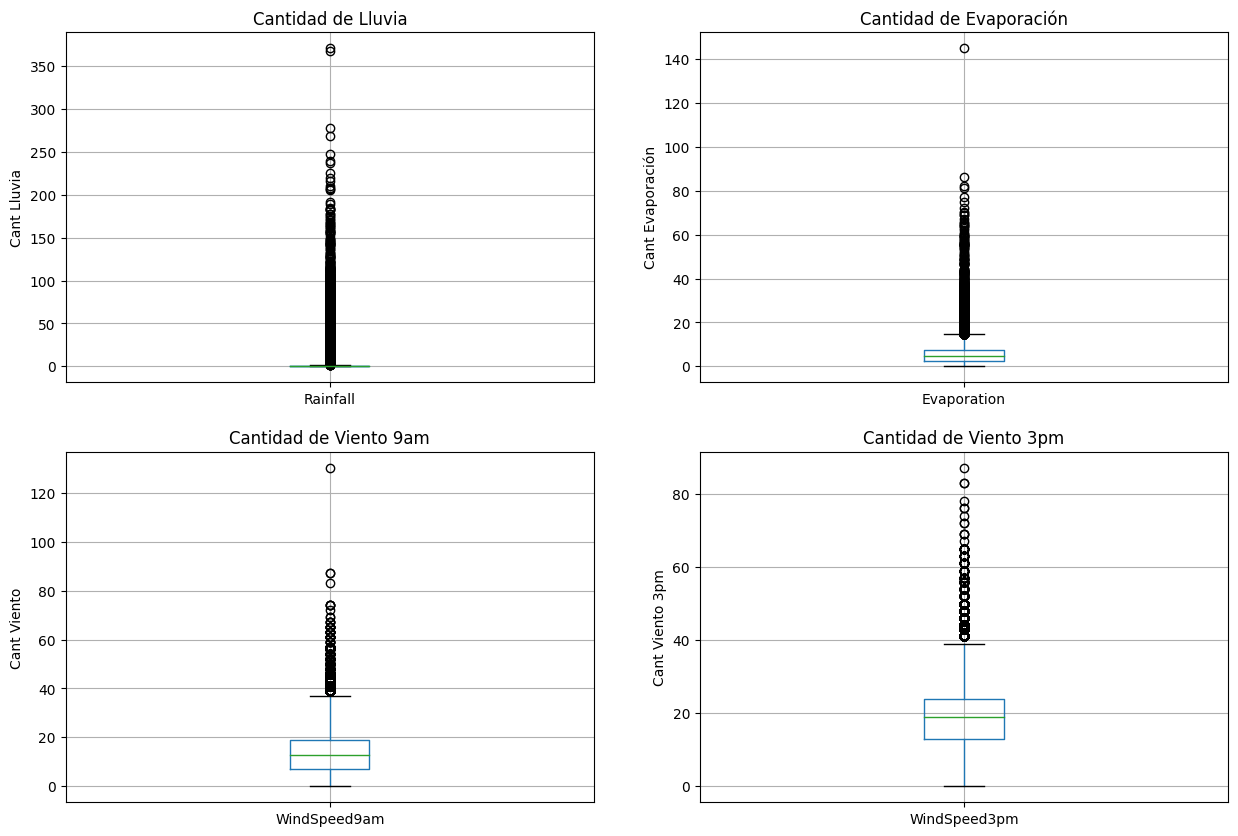

In [281]:
##Grafica para ver el ruido en los datos
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('Cantidad de Lluvia')
fig.set_ylabel('Cant Lluvia')

plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('Cantidad de Evaporación')
fig.set_ylabel('Cant Evaporación')

plt.subplot(2,2,3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('Cantidad de Viento 9am')
fig.set_ylabel('Cant Viento')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('Cantidad de Viento 3pm')
fig.set_ylabel('Cant Viento 3pm')

Text(0, 0.5, 'Llover Mañana')

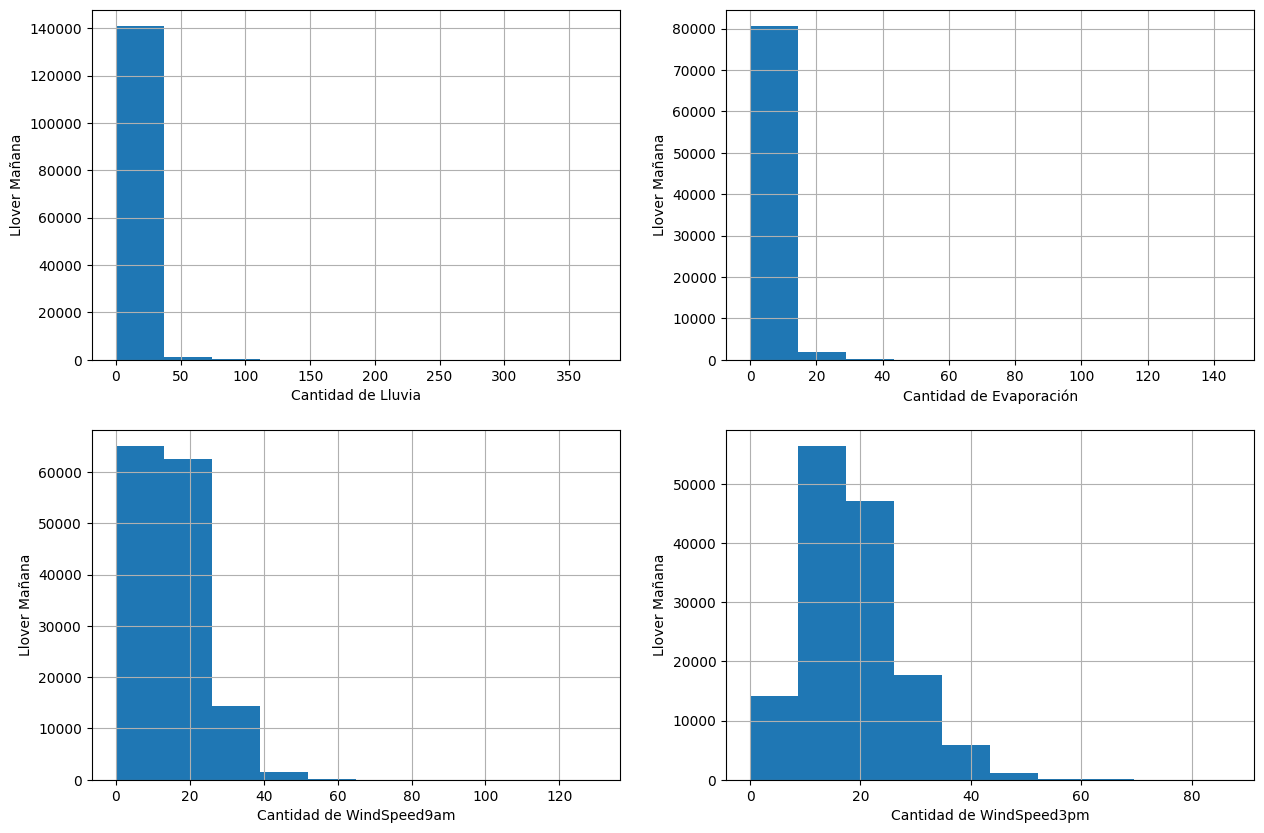

In [282]:
##Ver distribución de variables
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Cantidad de Lluvia')
fig.set_ylabel('Llover Mañana')

plt.subplot(2,2,2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Cantidad de Evaporación')
fig.set_ylabel('Llover Mañana')

plt.subplot(2,2,3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('Cantidad de WindSpeed9am')
fig.set_ylabel('Llover Mañana')


plt.subplot(2,2,4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('Cantidad de WindSpeed3pm')
fig.set_ylabel('Llover Mañana')

In [283]:
##Rango del ruido de esas variable numéricas - rango intercuantilico
IQR1 = df.Rainfall.quantile(0.75)- df.Rainfall.quantile(0.25)
puntomin = df.Rainfall.quantile(0.25) - (IQR1*3)
puntomax = df.Rainfall.quantile(0.75) + (IQR1*3)

print('Rainfall el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR1)
##El ruido arranca desde >3.2

Rainfall el ruido esta entre los valores -2.4000000000000004 y 3.2
El rango IQR es: 0.8
